In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout


In [2]:
dataset=pd.read_csv('D:\Sandesh\Data Science\Deep Learning\Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset[dataset.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
del X['Geography']

In [9]:
del X['Gender']

In [10]:
X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
# Splitting the Data into train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
# Sequential - For Doing forward and backward propogation.
# Dense - For creating neuron in hidden layer, input and output layers.

# Initialize the ANN
classifier=Sequential()

In [14]:
# adding the input layers
classifier.add(Dense(units=11,activation='relu'))

# adding the first hidden layers
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

# adding the second hidden layers
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

# adding the output layers
classifier.add(Dense(units=1,activation='sigmoid'))



In [15]:
# if we have to specify the learning rate harded code
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [16]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics='accuracy')


In [17]:
# Early stopping means when the accuracy is stagged , not getting increased after certain epochs then we can do early stopping.

import tensorflow as tf
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [18]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stop)


Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4815 - accuracy: 0.7867 - val_loss: 0.4224 - val_accuracy: 0.8042
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4441 - accuracy: 0.7867 - val_loss: 0.4119 - val_accuracy: 0.8042
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4215 - accuracy: 0.7908 - val_loss: 0.3769 - val_accuracy: 0.8485
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8216 - val_loss: 0.3774 - val_accuracy: 0.8497
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3995 - accuracy: 0.8358 - val_loss: 0.3645 - val_accuracy: 0.8349
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4037 - accuracy: 0.8378 - val_loss: 0.3522 - val_accuracy: 0.8637
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3912 - accuracy: 0.8434 - val_loss: 0.3833 - val_accuracy: 0.8637

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3803 - accuracy: 0.8543 - val_loss: 0.3495 - val_accuracy: 0.8660
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3819 - accuracy: 0.8513 - val_loss: 0.3517 - val_accuracy: 0.8591
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3829 - accuracy: 0.8485 - val_loss: 0.3498 - val_accuracy: 0.8595
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3780 - accuracy: 0.8530 - val_loss: 0.3543 - val_accuracy: 0.8565
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3769 - accuracy: 0.8505 - val_loss: 0.3503 - val_accuracy: 0.8542
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3802 - accuracy: 0.8528 - val_loss: 0.3546 - val_accuracy: 0.8614
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3756 - accuracy: 0.8565 - val_loss: 0.3487 - val_accuracy:

In [19]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

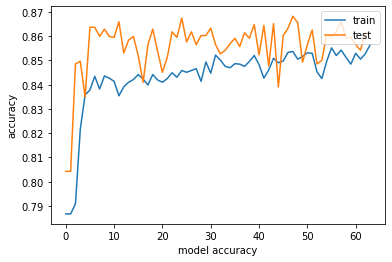

In [20]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

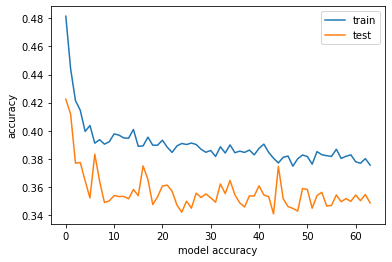

In [21]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [22]:
# predicting the test set results

y_pred=classifier.predict(X_test)
y_pred=(y_pred >=0.5)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1522  101]
 [ 199  178]]
0.85


In [24]:
# To check weights of every layers

classifier.get_weights()

[array([[ 2.37073287e-01, -9.89022106e-02,  8.83649468e-01,
          7.60212958e-01,  7.98488855e-02, -8.36524814e-02,
         -1.98710576e-01,  1.16285598e+00,  6.19975924e-01,
          7.30360150e-01,  2.76339352e-01],
        [-2.55538344e-01, -3.44244862e+00,  1.96701795e-01,
          1.63108206e+00, -1.30365551e+00,  1.48233688e+00,
         -1.30471516e+00, -3.31599307e+00, -7.18960285e-01,
         -2.17743814e-01, -4.64193821e+00],
        [-2.56026089e-01,  1.54126927e-01, -6.31290376e-01,
          4.76652145e-01,  2.20626855e+00,  5.13711035e-01,
         -2.34668702e-01,  4.10846144e-01,  1.46656716e+00,
         -1.66968191e+00,  2.30684355e-01],
        [-4.09293747e+00, -6.59458399e-01,  7.80762136e-01,
         -9.03492272e-01, -1.82259047e+00,  1.02527332e+00,
          1.04492493e-01, -9.02501404e-01, -1.52308202e+00,
         -1.07060063e+00, -1.98512185e+00],
        [-4.91645956e+00,  5.46620488e-01,  2.74729753e+00,
         -6.93182588e-01, -3.60618502e-01,  

### THE END 